In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from fhhps.estimator import fhhps
from fhhps.utils import generate_data
import matplotlib.pyplot as plt
from random import choice
sns.set_context("paper", font_scale=1.3)
%matplotlib inline

# Simulation Example

In [2]:
num_sims = 10
ns = [50, 100] # Small for speed. Increase in actual application. 

In [3]:
dfs = []

for s in range(num_sims):
    
    print(f"Running simulation {s+1}/{num_sims}...")
    
    # Choose a number of observations (useful to randomize when running in server)
    n = choice(ns)  
    
    # Generate jointly Gaussian fake data (see fhhps/utils.py)
    fake = generate_data(n, seed=s)
    
    result = fhhps(
        X = fake["df"][["X1", "X2", "X3"]].values,
        Z = fake["df"][["Z1", "Z2", "Z3"]].values,
        Y = fake["df"][["Y1", "Y2", "Y3"]].values,
        kernel1="gaussian",
        kernel2="neighbor",
        shock_bw1_const=1.,
        shock_bw2_const=1.,
        output_bw1_const_step1=1.,
        output_bw1_const_step2=1.,
        output_bw2_const=1.,
        censor1_const=1.,
        censor2_const=1.)
    
    dfs.append(result)

Running simulation 1/10...
Running simulation 2/10...
Running simulation 3/10...
Running simulation 4/10...
Running simulation 5/10...
Running simulation 6/10...
Running simulation 7/10...
Running simulation 8/10...
Running simulation 9/10...
Running simulation 10/10...


## Plots

In [4]:
df = pd.melt(pd.concat(dfs), id_vars=['n', 'kernel1', 'kernel2', 'output_bw1_const_step1',
       'output_bw1_const_step2', 'output_bw2_const', 'output_bw1_alpha',
       'output_bw2_alpha', 'shock_bw1_const', 'shock_bw2_const',
       'shock_bw1_alpha', 'shock_bw2_alpha', 'censor1_const', 'censor2_const'])
df.head()

,n,kernel1,kernel2,output_bw1_const_step1,output_bw1_const_step2,output_bw2_const,output_bw1_alpha,output_bw2_alpha,shock_bw1_const,shock_bw2_const,shock_bw1_alpha,shock_bw2_alpha,censor1_const,censor2_const,variable,value
0,100,gaussian,neighbor,1.0,1.0,1.0,0.1,0.1,1.0,1.0,0.166667,0.166667,1.0,1.0,mean_valid,0.82
1,50,gaussian,neighbor,1.0,1.0,1.0,0.1,0.1,1.0,1.0,0.166667,0.166667,1.0,1.0,mean_valid,0.76
2,50,gaussian,neighbor,1.0,1.0,1.0,0.1,0.1,1.0,1.0,0.166667,0.166667,1.0,1.0,mean_valid,0.78
3,50,gaussian,neighbor,1.0,1.0,1.0,0.1,0.1,1.0,1.0,0.166667,0.166667,1.0,1.0,mean_valid,0.76
4,50,gaussian,neighbor,1.0,1.0,1.0,0.1,0.1,1.0,1.0,0.166667,0.166667,1.0,1.0,mean_valid,0.92


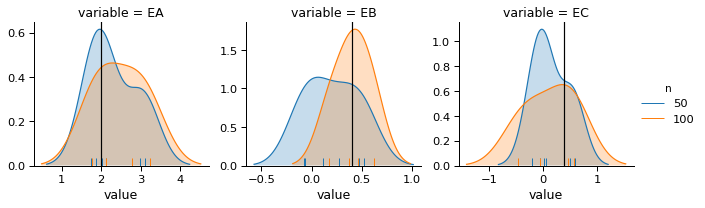

In [5]:
g = sns.FacetGrid(data=df,
                  hue="n",
                  col="variable", 
                  col_order=["EA", "EB", "EC"],
                  sharey=False, 
                  sharex=False)
g.map(sns.kdeplot, "value", shade=True)
g.map(sns.rugplot, "value")
g.add_legend()

mean_truth = np.array([2. , 0.4, 0.4])
for k, ax in enumerate(g.axes.flatten()):
    ax.axvline(mean_truth[k], color="black")

plt.show()

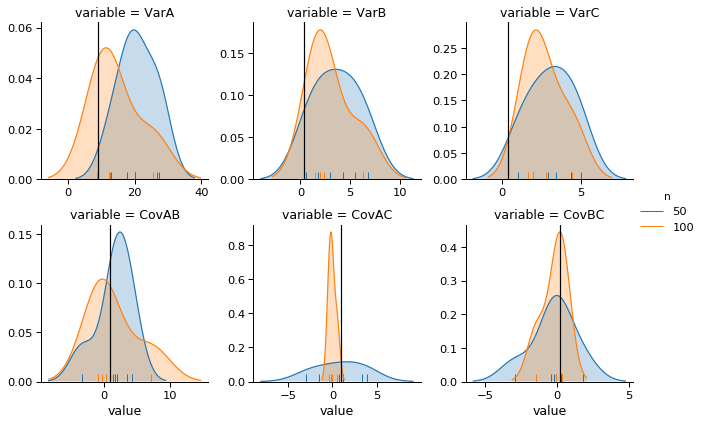

In [6]:
g = sns.FacetGrid(data=df,
                  hue="n",
                  col="variable", 
                  col_order=["VarA", "VarB", "VarC", 
                             "CovAB", "CovAC", "CovBC"],
                  col_wrap=3,
                  sharey=False, 
                  sharex=False)
g.map(sns.kdeplot, "value", shade=True)
g.map(sns.rugplot, "value")
g.add_legend()

cov_truth = np.array([9.       , 0.4      , 0.4      , 0.9486833, 0.9486833, 0.2])
for k, ax in enumerate(g.axes.flatten()):
    ax.axvline(cov_truth[k], color="black")

plt.show()